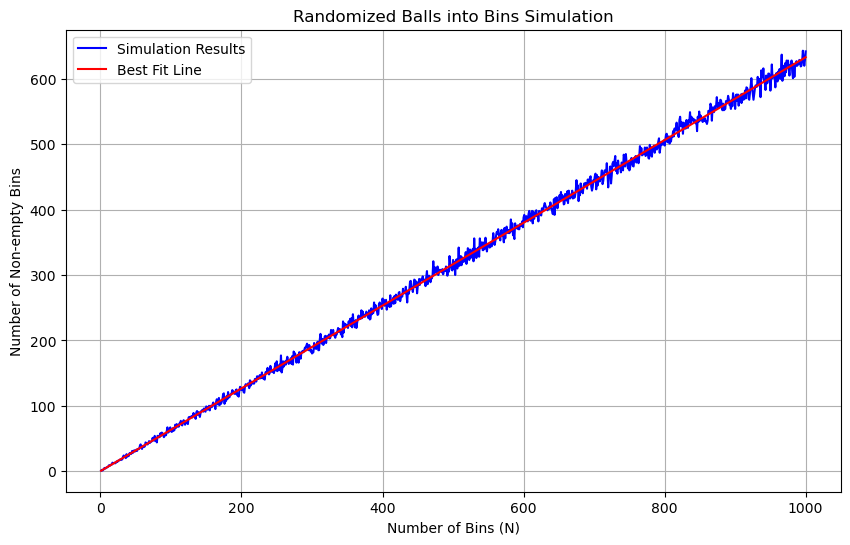

Solution
Slope: 0.632957360957361
Intercept: 0.06684084084082542
R-value: 0.9993199253102742


In [8]:
# author: Nekruz Ashrapov
# references: https://en.wikipedia.org/wiki/Coupon_collector%27s_problem, 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

# My results:
# Slope: 0.6326812286812287
# Intercept: 0.01304504504508941
# R-value: 0.9992452385435605

# From what I understand the slope is 0.6326 because 
# it falls under the famous coupon collector's problem.
# This means that the value of the slope is very close to 
# the well known result in probability theory where expected
# number of trials needed to collect all coupons (in our case bins)
# is N * (1 + ... 1/N) repeated, which means it converges to N * ln(N) as
# N goes to infinity. The ratio of filled bins to total bins ends up
# converging to 1-1/e. Which proves the slope being 0.6326.

#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def simulateBalls(N):
    #initializing an array to represent the bins
    bins = np.zeros(N)
    #repeatedly assigning a ball to a bin
    for _ in range(N):
        #random index selection
        bin_index = np.random.randint(0, N)
        #incrementing the num of balls in that bin
        bins[bin_index] += 1
    #counting the number of bins that have at least 1 ball
    non_empty_bins = np.count_nonzero(bins)
    return non_empty_bins

#simulating the experiment for different values of N
N_values = range(1, 1001)
results = [simulateBalls(N) for N in N_values]

#plotting the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, results, label='Simulation Results', color='blue')
plt.xlabel('Number of Bins (N)')
plt.ylabel('Number of Non-empty Bins')
plt.title('Randomized Balls into Bins Simulation')
plt.grid(True)
plt.legend()

#linregress function calculates the slope, intercept, 
#correlation coefficient, p-value, and standard error of the regression
slope, intercept, rvalue, _, _ = linregress(N_values, results)

#plotting the best fit line
plt.plot(N_values, intercept + slope * np.array(N_values), color='red', label='Best Fit Line')

plt.legend()

plt.show()
#printint the results here
print("Solution")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", rvalue)
